In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from shapely.geometry import Point
import os
import matplotlib.pyplot as plt

print(plt.style.available)
plt.style.use("seaborn-v0_8")



['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/tmp/ipykernel_6187/2360698793.py:39: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf[gdf['Datasets'] == 2].plot(ax=ax, color='black', marker='o', markersize=marker_size_on_plot,


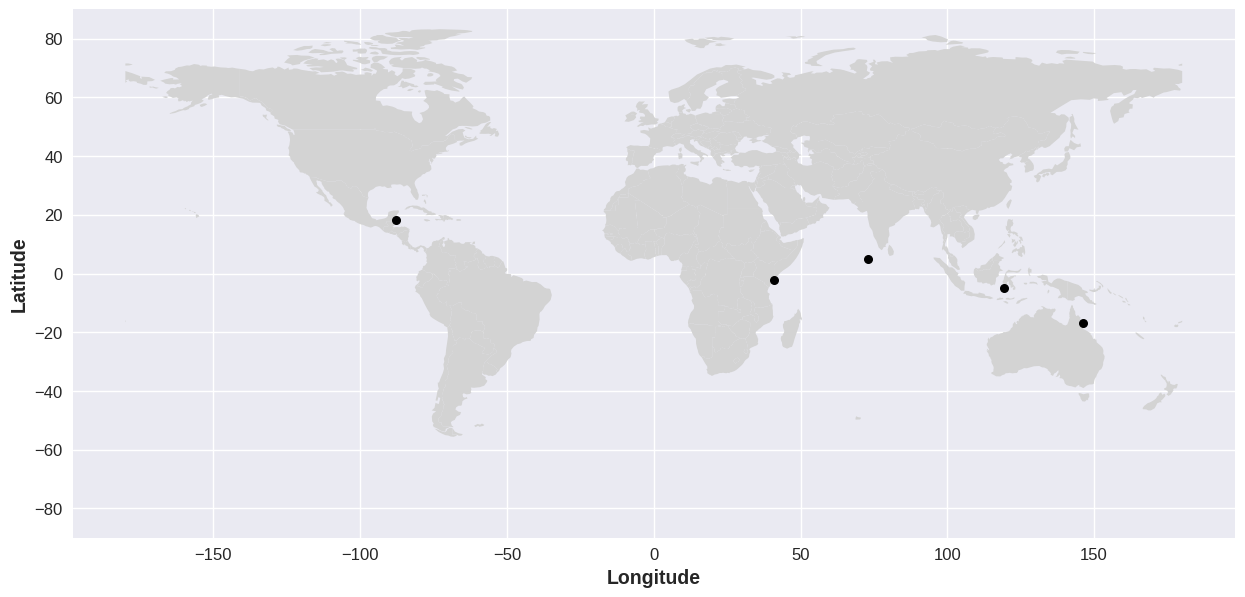

In [14]:
BASE_DIR = os.getenv("BASE_DIR")
if not BASE_DIR:
  raise ValueError("BASE_DIR environment variable is not set.")

# Data preparation
data = {
    'Location': ['Australia', 'Indonesia', 'Kenya', 'Maldives', 'Mexico'],
    'Latitude': [-16.84781, -4.93154, -2.21474, 4.8864, 18.333292],
    'Longitude': [146.22798, 119.31577,  41.01613, 72.9278, -87.808362],
    'Datasets': [1, 1, 1, 1, 1]
}

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    data, 
    geometry=[Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
)

# World basemap
base_map_path = os.path.join(BASE_DIR, "marrs_acoustics/code/scratch/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world = gpd.read_file(base_map_path)

# Clipping the world map to the specified latitude range
world_clipped = world.cx[:, -60:60]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_clipped.plot(ax=ax, color='lightgrey')

# Set the y-limits (latitude) of the map to -50 to 50
ax.set_ylim(-90, 90)

# Adjust marker size for the plot here
marker_size_on_plot = 30

# Plotting points with thicker black outlines
gdf[gdf['Datasets'] == 1].plot(ax=ax, color='black', marker='o', markersize=marker_size_on_plot, 
                               label='1 Dataset', edgecolor='black', linewidth=1)
gdf[gdf['Datasets'] == 2].plot(ax=ax, color='black', marker='o', markersize=marker_size_on_plot, 
                               label='2 Datasets', edgecolor='black', linewidth=1)

# Title and labels
plt.xlabel('Longitude', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Latitude', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12)

# Show plot
plt.show()

